In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_prv_df=pd.read_csv('health_care_claim/Train-1542865627584.csv')
train_prv_df.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [3]:
train_bene_df=pd.read_csv('health_care_claim/Train_Beneficiarydata-1542865627584.csv')
train_bene_df.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [4]:
train_in_df=pd.read_csv('health_care_claim/Train_Inpatientdata-1542865627584.csv')
train_in_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [5]:
train_out_df=pd.read_csv('health_care_claim/Train_Outpatientdata-1542865627584.csv')
train_out_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## Provider Data-Set

In [6]:
train_prv_df['PotentialFraud']=train_prv_df.PotentialFraud.map({'Yes':1, 'No':0})

0    4904
1     506
Name: PotentialFraud, dtype: int64

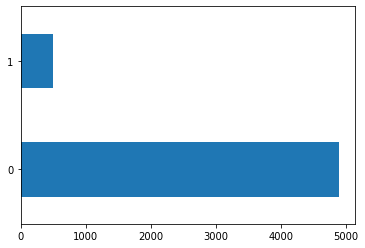

In [7]:
train_prv_df['PotentialFraud'].value_counts().plot(kind='barh')
train_prv_df['PotentialFraud'].value_counts()

## Beneficiary data 

In [8]:
train_bene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

In [9]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [10]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

train_bene_df = train_bene_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

In [11]:
train_bene_df['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

In [12]:
train_bene_df['Gender']=train_bene_df['Gender'].map({2:'M', 1:'F'})

In [13]:
# convert DOB and DOD to datetime object

train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'] , format = '%Y-%m-%d')
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'],format = '%Y-%m-%d',errors='ignore')

#creating age column

train_bene_df['Age'] = round(((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days)/365)

In [14]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

train_bene_df.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - train_bene_df['DOB']).dt.days)/365),
                                 inplace=True)

In [15]:
train_bene_df.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,F,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0


In [16]:
# creating IsDead feature

train_bene_df.loc[train_bene_df.DOD.isna(),'IsDead']=0
train_bene_df.loc[train_bene_df.DOD.notna(),'IsDead']=1
train_bene_df.loc[:,'IsDead'].head(7)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
Name: IsDead, dtype: float64

In [17]:
train_bene_df = train_bene_df.replace({'RenalDiseaseIndicator': 'Y'}, 1)
train_bene_df.RenalDiseaseIndicator.value_counts()

0    118978
1     19578
Name: RenalDiseaseIndicator, dtype: int64

In [18]:
train_bene_df.drop(labels=['DOB', 'DOD', 'Race', 'State', 'County'], axis=1, inplace=True)
train_bene_df.columns

Index(['BeneID', 'Gender', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsDead'],
      dtype='object')

In [19]:
train_bene_df.NoOfMonths_PartACov.value_counts()

12    137389
0       1000
6         38
11        28
8         26
10        18
7         16
4         13
5          8
9          7
3          5
2          5
1          3
Name: NoOfMonths_PartACov, dtype: int64

In [20]:
train_bene_df.loc[train_bene_df.NoOfMonths_PartACov==12,'Month_Covered_12']=1
train_bene_df.loc[train_bene_df.NoOfMonths_PartACov!=12,'Month_Covered_12']=0

In [21]:
train_bene_df.head(1)

,BeneID,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,F,0,12,12,1,0,1,0,0,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0


In [22]:
train_bene_df.Month_Covered_12.value_counts()

1.0    137389
0.0      1167
Name: Month_Covered_12, dtype: int64

## In Patient

In [23]:
train_in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [24]:
# As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

train_in_df['AdmissionDt'] = pd.to_datetime(train_in_df['AdmissionDt'] , format = '%Y-%m-%d')
train_in_df['DischargeDt'] = pd.to_datetime(train_in_df['DischargeDt'],format = '%Y-%m-%d')
train_in_df['AdmitForDays'] = ((train_in_df['DischargeDt'] - train_in_df['AdmissionDt']).dt.days)+1

In [25]:
print('Min AdmitForDays Train:- ',train_in_df.AdmitForDays.min())
print('Max AdmitForDays Train:- ',train_in_df.AdmitForDays.max())
train_in_df.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36


0

In [26]:
train_in_df.AdmitForDays.describe()

count    40474.000000
mean         6.665168
std          5.638538
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         36.000000
Name: AdmitForDays, dtype: float64

In [27]:
train_in_df['ClaimStartDt'] = pd.to_datetime(train_in_df['ClaimStartDt'] , format = '%Y-%m-%d')
train_in_df['ClaimEndDt'] = pd.to_datetime(train_in_df['ClaimEndDt'],format = '%Y-%m-%d')

In [28]:
train_in_df['ClaimTimeTaken'] = ((train_in_df['ClaimEndDt'] - train_in_df['ClaimStartDt']).dt.days)+1

In [29]:
print('Min ClaimTimeTaken Train:- ',train_in_df.ClaimTimeTaken.min())
print('Max ClaimTimeTaken Train:- ',train_in_df.ClaimTimeTaken.max())

Min ClaimTimeTaken Train:-  1
Max ClaimTimeTaken Train:-  37


In [30]:
train_in_df.ClaimTimeTaken.describe()

count    40474.000000
mean         6.660251
std          5.628873
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         37.000000
Name: ClaimTimeTaken, dtype: float64

In [31]:
train_in_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmitForDays,ClaimTimeTaken
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,3,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,9,9
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,18,18


In [32]:
train_in_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'AdmitForDays', 'ClaimTimeTaken'],
      dtype='object')

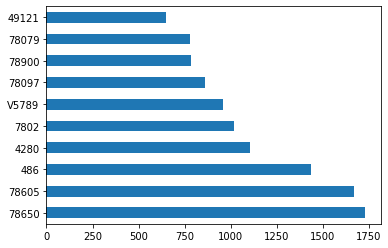

In [33]:
train_in_df.ClmAdmitDiagnosisCode.value_counts()[0:10].plot(kind='barh')

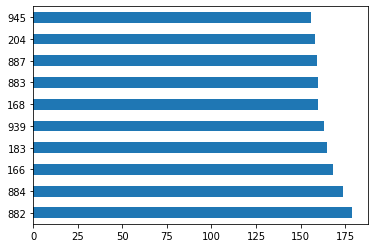

In [34]:
train_in_df.DiagnosisGroupCode.value_counts()[:10].plot(kind='barh')

In [35]:
train_in_df.ClmProcedureCode_1.value_counts()

9904.0    1137
8154.0    1021
66.0       893
3893.0     849
3995.0     805
          ... 
8018.0       1
302.0        1
9626.0       1
8013.0       1
1474.0       1
Name: ClmProcedureCode_1, Length: 1117, dtype: int64

In [36]:
train_in_df.drop(labels=['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [37]:
train_in_df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AdmitForDays,ClaimTimeTaken
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,40474.000000,40474.000000
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,6.665168,6.660251
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,5.638538,5.628873
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,1.000000,1.000000
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,3.000000,3.000000
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,5.000000,5.000000
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,8.000000,8.000000
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,36.000000,37.000000


In [38]:
train_in_df.head(5)

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AdmitForDays,ClaimTimeTaken
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,7,7
1,BENE11001,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,3,3
2,BENE11001,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
3,BENE11011,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,9,9
4,BENE11014,PRV56614,10000,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,18,18


In [39]:
train_in_df.shape

(40474, 25)

In [40]:
train_bene_df.shape

(138556, 23)

In [41]:
train_bene_df.head(1)

,BeneID,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,F,0,12,12,1,0,1,0,0,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0


### Joining train_in_df with train_bene_df

In [42]:
train_in_patient=pd.merge(train_in_df,train_bene_df,left_on='BeneID',right_on='BeneID',how='inner')

In [43]:
train_in_patient.head()

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
1,BENE11001,PRV55907,5000,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
2,BENE11001,PRV56046,5000,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0
3,BENE11011,PRV52405,5000,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,...,0,1,1,5000,1068,250,320,96.0,0.0,1.0
4,BENE11014,PRV56614,10000,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,...,0,0,0,21260,2136,120,100,72.0,0.0,1.0


In [44]:
train_in_patient.shape

(40474, 47)

In [45]:
train_in_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'AdmitForDays', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAn

In [46]:
train_prv_df.PotentialFraud.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [47]:
train_in_patient=pd.merge(train_in_patient, train_prv_df, left_on='Provider', right_on='Provider', how='inner')

In [48]:
train_in_patient

,BeneID,Provider,InscClaimAmtReimbursed,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
0,BENE11001,PRV55912,26000,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,...,1,1,36000,3204,60,70,67.0,0.0,1.0,1
1,BENE17521,PRV55912,19000,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,...,0,0,19000,1068,100,20,96.0,0.0,1.0,1
2,BENE21718,PRV55912,17000,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,...,0,0,17000,1068,1050,540,87.0,0.0,1.0,1
3,BENE22934,PRV55912,13000,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,...,1,0,27000,2136,450,160,79.0,0.0,1.0,1
4,BENE24402,PRV55912,3000,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,...,0,0,3000,1068,8900,740,84.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE156181,PRV55706,12000,2009-06-24,78097,1068.0,2009-07-01,940,78079,45341,...,1,1,20000,2136,740,320,58.0,0.0,1.0,0
40470,BENE156872,PRV51572,5000,2009-09-06,486,1068.0,2009-09-13,190,486,7905,...,0,1,5000,1068,2670,360,67.0,0.0,1.0,0
40471,BENE157414,PRV55688,14000,2009-11-15,4280,1068.0,2009-11-23,308,42821,E9342,...,1,0,26790,2136,70,0,70.0,0.0,1.0,0
40472,BENE158281,PRV56485,10000,2009-01-23,7823,1068.0,2009-01-23,238,41071,78552,...,0,0,10300,1068,5390,1730,52.0,0.0,1.0,0


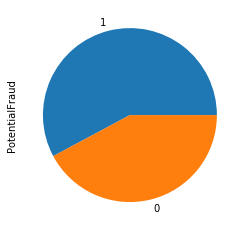

In [49]:
train_in_patient.PotentialFraud.value_counts().plot(kind='pie')

In [50]:
train_in_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'AdmitForDays', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAn

In [51]:
train_in_patient.drop(labels=['BeneID', 'Provider','AdmissionDt', 'DischargeDt'],inplace=True, axis=1)

In [52]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 44 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
ClmDiagnosisCode_4                 38940 non-null object
ClmDiagnosisCode_5                 37580 non-null object
ClmDiagnosisCode_6                 35636 non-null object
ClmDiagnosisCode_7                 33216 non-null object
ClmDiagnosisCode_8                 30532 non-null object
ClmDiagnosisCode_9                 26977 non-null object
ClmDiagnosisCode_10                3927 non-null object
ClmProcedureCode_1                 23148 non-null float64
ClmProcedureCode_2                 5

In [53]:
train_in_patient.drop(labels=['ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5'],inplace=True, axis=1)

In [54]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 39 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
ClmDiagnosisCode_4                 38940 non-null object
ClmDiagnosisCode_5                 37580 non-null object
ClmDiagnosisCode_6                 35636 non-null object
ClmDiagnosisCode_7                 33216 non-null object
ClmDiagnosisCode_8                 30532 non-null object
ClmDiagnosisCode_9                 26977 non-null object
ClmDiagnosisCode_10                3927 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     404

In [55]:
train_in_patient.drop(labels=['ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',],inplace=True, axis=1)

In [56]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 32 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
NoOfMonths_PartACov                40474 non-null int64
NoOfMonths_PartBCov                40474 non-null int64
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 n

In [57]:
train_in_patient.InscClaimAmtReimbursed.describe()

count     40474.000000
mean      10087.884074
std       10303.099402
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [58]:
train_in_patient[train_in_patient['PotentialFraud']==1]['InscClaimAmtReimbursed'].describe()

count     23402.000000
mean      10310.593539
std       10671.735902
min           0.000000
25%        4000.000000
50%        7000.000000
75%       12000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [59]:
train_in_patient[train_in_patient['PotentialFraud']==0]['InscClaimAmtReimbursed'].describe()

count     17072.000000
mean       9782.597821
std        9767.276716
min           0.000000
25%        4000.000000
50%        7000.000000
75%       11000.000000
max      125000.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [60]:
quant999=train_in_patient['InscClaimAmtReimbursed'].quantile(0.999)
quant001=train_in_patient['InscClaimAmtReimbursed'].quantile(0.001)
print(quant999, quant001)

90000.0 0.0


In [61]:
train_in_patient[train_in_patient['InscClaimAmtReimbursed']>quant999]['PotentialFraud'].value_counts()

1    27
0    13
Name: PotentialFraud, dtype: int64

In [62]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 32 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DeductibleAmtPaid                  39575 non-null float64
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
NoOfMonths_PartACov                40474 non-null int64
NoOfMonths_PartBCov                40474 non-null int64
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 n

In [63]:
train_in_patient.DeductibleAmtPaid.value_counts()

1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

In [64]:
train_in_patient.drop(['DeductibleAmtPaid'], axis=1,inplace=True)

In [65]:
train_in_patient.drop(['NoOfMonths_PartACov','NoOfMonths_PartBCov'], axis=1,inplace=True)

In [66]:
train_in_patient[train_in_patient['PotentialFraud']==0].describe()

,InscClaimAmtReimbursed,AdmitForDays,ClaimTimeTaken,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
count,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,...,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.000000,17072.0
mean,9782.597821,6.559571,6.553831,0.506385,0.717256,0.600574,0.189843,0.476921,0.501640,0.802484,...,0.356842,0.167994,17131.792409,1872.230787,1833.889410,520.037605,74.063613,0.008318,0.992092,0.0
std,9767.276716,5.340645,5.329792,0.499974,0.450346,0.489795,0.392188,0.499482,0.500012,0.398137,...,0.479082,0.373872,17047.575718,1668.067004,3745.758245,934.647927,13.290553,0.090824,0.088575,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-50.000000,0.000000,26.000000,0.000000,0.000000,0.0
25%,4000.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6000.000000,1068.000000,180.000000,40.000000,68.000000,0.000000,1.000000,0.0
50%,7000.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,11600.000000,1068.000000,720.000000,210.000000,75.000000,0.000000,1.000000,0.0
75%,11000.000000,8.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,21807.500000,2136.000000,1972.500000,600.000000,83.000000,0.000000,1.000000,0.0
max,125000.000000,36.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,155600.000000,38272.000000,97510.000000,12090.000000,101.000000,1.000000,1.000000,0.0


In [67]:
train_in_patient[train_in_patient['PotentialFraud']==1].describe()

,InscClaimAmtReimbursed,AdmitForDays,ClaimTimeTaken,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
count,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,...,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.000000,23402.0
mean,10310.593539,6.742202,6.737886,0.502350,0.725152,0.602641,0.191778,0.480771,0.502649,0.801726,...,0.362918,0.171182,17818.153149,1898.572002,1943.356551,536.090548,74.153363,0.007521,0.992565,1.0
std,10671.735902,5.845195,5.836285,0.500005,0.446447,0.489362,0.393708,0.499641,0.500004,0.398708,...,0.480852,0.376676,17923.052466,1700.368631,4090.862950,957.810205,13.104408,0.086397,0.085909,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-70.000000,0.000000,26.000000,0.000000,0.000000,1.0
25%,4000.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6020.000000,1068.000000,190.000000,40.000000,68.000000,0.000000,1.000000,1.0
50%,7000.000000,5.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,12000.000000,1068.000000,750.000000,220.000000,75.000000,0.000000,1.000000,1.0
75%,12000.000000,8.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,22200.000000,2136.000000,2060.000000,620.000000,83.000000,0.000000,1.000000,1.0
max,125000.000000,36.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.000000,1.000000,1.0


In [68]:
quant999=train_in_patient['IPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_in_patient['IPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['IPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

136000.0 0.0


1    27
0    12
Name: PotentialFraud, dtype: int64

In [69]:
quant999=train_in_patient['IPAnnualDeductibleAmt'].quantile(0.999)
quant001=train_in_patient['IPAnnualDeductibleAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['IPAnnualDeductibleAmt']>quant999]['PotentialFraud'].value_counts()

22272.0 1068.0


1    22
0    18
Name: PotentialFraud, dtype: int64

In [70]:
quant999=train_in_patient['OPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_in_patient['OPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_in_patient[train_in_patient['OPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

37339.31000000099 0.0


1    25
0    16
Name: PotentialFraud, dtype: int64

In [71]:
train_in_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 29 columns):
InscClaimAmtReimbursed             40474 non-null int64
ClmAdmitDiagnosisCode              40474 non-null object
DiagnosisGroupCode                 40474 non-null object
ClmDiagnosisCode_1                 40474 non-null object
ClmDiagnosisCode_2                 40248 non-null object
ClmDiagnosisCode_3                 39798 non-null object
AdmitForDays                       40474 non-null int64
ClaimTimeTaken                     40474 non-null int64
Gender                             40474 non-null object
RenalDiseaseIndicator              40474 non-null object
ChronicCond_Alzheimer              40474 non-null int64
ChronicCond_Heartfailure           40474 non-null int64
ChronicCond_KidneyDisease          40474 non-null int64
ChronicCond_Cancer                 40474 non-null int64
ChronicCond_ObstrPulmonary         40474 non-null int64
ChronicCond_Depression             40474 non

In [72]:
train_in_patient['Gender_Male']=train_in_patient['Gender'].map({'M':1, 'F':0})

In [73]:
train_in_patient['RenalDiseaseIndicator'].value_counts()

0    29941
1    10533
Name: RenalDiseaseIndicator, dtype: int64

In [74]:
train_in_patient.columns

Index(['InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'AdmitForDays', 'ClaimTimeTaken', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12',
       'PotentialFraud', 'Gender_Male'],
      dtype='object')

## Out Patient

In [75]:
train_out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [76]:
train_out_df['ClaimStartDt'] = pd.to_datetime(train_out_df['ClaimStartDt'] , format = '%Y-%m-%d')
train_out_df['ClaimEndDt'] = pd.to_datetime(train_out_df['ClaimEndDt'],format = '%Y-%m-%d')

In [77]:
train_out_df['ClaimTimeTaken'] = ((train_out_df['ClaimEndDt'] - train_out_df['ClaimStartDt']).dt.days)+1

In [78]:
print('Min ClaimTimeTaken Train:- ',train_out_df.ClaimTimeTaken.min())
print('Max ClaimTimeTaken Train:- ',train_out_df.ClaimTimeTaken.max())

Min ClaimTimeTaken Train:-  1
Max ClaimTimeTaken Train:-  24


In [79]:
train_out_df.ClaimTimeTaken.describe()

count    517737.000000
mean          2.420532
std           4.707387
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          24.000000
Name: ClaimTimeTaken, dtype: float64

In [80]:
train_out_df.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimTimeTaken
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,1
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,1
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,1


In [81]:
train_out_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimTimeTaken'],
      dtype='object')

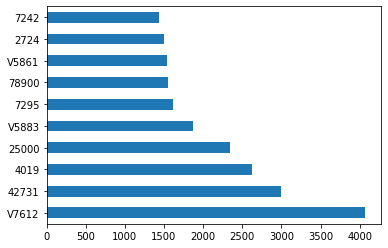

In [82]:
train_out_df.ClmAdmitDiagnosisCode.value_counts()[0:10].plot(kind='barh')

In [83]:
train_out_df.ClmProcedureCode_1.value_counts()

9904.0    15
3722.0     8
4516.0     8
5123.0     7
66.0       7
          ..
5304.0     1
5185.0     1
9999.0     1
9961.0     1
527.0      1
Name: ClmProcedureCode_1, Length: 80, dtype: int64

In [84]:
train_out_df.drop(labels=['ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmProcedureCode_6'], axis=1, inplace=True)

In [85]:
train_out_df.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,ClaimTimeTaken
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,517737.000000,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,2.779233,2.420532
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,15.785839,4.707387
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,0.000000,1.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,0.000000,1.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,0.000000,1.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,0.000000,1.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,897.000000,24.000000


In [86]:
train_out_df.head(5)

,BeneID,Provider,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimTimeTaken
0,BENE11002,PRV56011,30,78943,V5866,V1272,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,1
1,BENE11003,PRV57610,80,6115,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,1
2,BENE11003,PRV57595,10,2723,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
3,BENE11004,PRV56011,40,71988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1
4,BENE11004,PRV56011,200,82382,30000,72887,4280,7197,V4577,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,1


In [87]:
train_out_df.shape

(517737, 21)

In [88]:
train_bene_df.shape

(138556, 23)

In [89]:
train_bene_df.head(1)

,BeneID,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11001,F,0,12,12,1,0,1,0,0,...,0,1,1,36000,3204,60,70,67.0,0.0,1.0


### Joining train_out_df with train_bene_df

In [90]:
train_out_patient=pd.merge(train_out_df,train_bene_df,left_on='BeneID',right_on='BeneID',how='inner')

In [91]:
train_out_patient.head()

,BeneID,Provider,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12
0,BENE11002,PRV56011,30,78943,V5866,V1272,NaN,NaN,NaN,NaN,...,0,0,0,0,0,30,50,73.0,0.0,1.0
1,BENE11003,PRV57610,80,6115,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,90,40,73.0,0.0,1.0
2,BENE11003,PRV57595,10,2723,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,90,40,73.0,0.0,1.0
3,BENE11004,PRV56011,40,71988,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,0,0,1810,760,87.0,0.0,1.0
4,BENE11004,PRV56011,200,82382,30000,72887,4280,7197,V4577,NaN,...,1,1,0,0,0,1810,760,87.0,0.0,1.0


In [92]:
train_out_patient.shape

(517737, 43)

In [93]:
train_out_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimburseme

In [94]:
train_prv_df.PotentialFraud.value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [95]:
train_out_patient=pd.merge(train_out_patient, train_prv_df, left_on='Provider', right_on='Provider', how='inner')

In [96]:
train_out_patient

,BeneID,Provider,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
0,BENE11002,PRV56011,30,78943,V5866,V1272,NaN,NaN,NaN,NaN,...,0,0,0,0,30,50,73.0,0.0,1.0,1
1,BENE11004,PRV56011,40,71988,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1810,760,87.0,0.0,1.0,1
2,BENE11004,PRV56011,200,82382,30000,72887,4280,7197,V4577,NaN,...,1,0,0,0,1810,760,87.0,0.0,1.0,1
3,BENE11004,PRV56011,20,20381,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1810,760,87.0,0.0,1.0,1
4,BENE11004,PRV56011,40,V6546,4280,2449,V854,NaN,NaN,NaN,...,1,0,0,0,1810,760,87.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE154687,PRV54302,3300,99661,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,4400,220,83.0,0.0,1.0,0
517733,BENE157252,PRV57762,1900,2330,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,15000,1068,2540,400,68.0,0.0,1.0,0
517734,BENE157378,PRV51577,2100,5854,7907,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,14240,2810,64.0,0.0,1.0,0
517735,BENE158295,PRV53083,10,42789,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,640,350,85.0,0.0,1.0,0


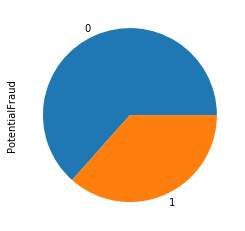

In [97]:
train_out_patient.PotentialFraud.value_counts().plot(kind='pie')

In [98]:
train_out_patient.columns

Index(['BeneID', 'Provider', 'InscClaimAmtReimbursed', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimTimeTaken', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimburseme

In [99]:
train_out_patient.drop(labels=['BeneID', 'Provider'],inplace=True, axis=1)

In [100]:
train_out_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 42 columns):
InscClaimAmtReimbursed             517737 non-null int64
ClmDiagnosisCode_1                 507284 non-null object
ClmDiagnosisCode_2                 322357 non-null object
ClmDiagnosisCode_3                 203257 non-null object
ClmDiagnosisCode_4                 125596 non-null object
ClmDiagnosisCode_5                 74344 non-null object
ClmDiagnosisCode_6                 48756 non-null object
ClmDiagnosisCode_7                 32961 non-null object
ClmDiagnosisCode_8                 22912 non-null object
ClmDiagnosisCode_9                 14838 non-null object
ClmDiagnosisCode_10                1083 non-null object
ClmProcedureCode_1                 162 non-null float64
ClmProcedureCode_2                 36 non-null float64
ClmProcedureCode_3                 4 non-null float64
ClmProcedureCode_4                 2 non-null float64
ClmProcedureCode_5                 0 non

In [101]:
train_out_patient.drop(labels=['ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5'],inplace=True, axis=1)

In [102]:
train_out_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 37 columns):
InscClaimAmtReimbursed             517737 non-null int64
ClmDiagnosisCode_1                 507284 non-null object
ClmDiagnosisCode_2                 322357 non-null object
ClmDiagnosisCode_3                 203257 non-null object
ClmDiagnosisCode_4                 125596 non-null object
ClmDiagnosisCode_5                 74344 non-null object
ClmDiagnosisCode_6                 48756 non-null object
ClmDiagnosisCode_7                 32961 non-null object
ClmDiagnosisCode_8                 22912 non-null object
ClmDiagnosisCode_9                 14838 non-null object
ClmDiagnosisCode_10                1083 non-null object
DeductibleAmtPaid                  517737 non-null int64
ClmAdmitDiagnosisCode              105425 non-null object
ClaimTimeTaken                     517737 non-null int64
Gender                             517737 non-null object
RenalDiseaseIndicator        

In [103]:
train_out_patient.drop(labels=['ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',],inplace=True, axis=1)

In [104]:
train_out_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 30 columns):
InscClaimAmtReimbursed             517737 non-null int64
ClmDiagnosisCode_1                 507284 non-null object
ClmDiagnosisCode_2                 322357 non-null object
ClmDiagnosisCode_3                 203257 non-null object
DeductibleAmtPaid                  517737 non-null int64
ClmAdmitDiagnosisCode              105425 non-null object
ClaimTimeTaken                     517737 non-null int64
Gender                             517737 non-null object
RenalDiseaseIndicator              517737 non-null object
NoOfMonths_PartACov                517737 non-null int64
NoOfMonths_PartBCov                517737 non-null int64
ChronicCond_Alzheimer              517737 non-null int64
ChronicCond_Heartfailure           517737 non-null int64
ChronicCond_KidneyDisease          517737 non-null int64
ChronicCond_Cancer                 517737 non-null int64
ChronicCond_ObstrPulmonary  

In [105]:
train_out_patient.InscClaimAmtReimbursed.describe()

count    517737.000000
mean        286.334799
std         694.034343
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [106]:
train_out_patient[train_out_patient['PotentialFraud']==1]['InscClaimAmtReimbursed'].describe()

count    189394.000000
mean        287.192889
std         778.251679
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max      102500.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [107]:
train_out_patient[train_out_patient['PotentialFraud']==0]['InscClaimAmtReimbursed'].describe()

count    328343.000000
mean        285.839838
std         640.440367
min           0.000000
25%          40.000000
50%          80.000000
75%         200.000000
max       84660.000000
Name: InscClaimAmtReimbursed, dtype: float64

In [108]:
quant999=train_out_patient['InscClaimAmtReimbursed'].quantile(0.999)
quant001=train_out_patient['InscClaimAmtReimbursed'].quantile(0.001)
print(quant999, quant001)

3500.0 0.0


In [109]:
train_out_patient[train_out_patient['InscClaimAmtReimbursed']>quant999]['PotentialFraud'].value_counts()

0    301
1    197
Name: PotentialFraud, dtype: int64

In [110]:
train_out_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 30 columns):
InscClaimAmtReimbursed             517737 non-null int64
ClmDiagnosisCode_1                 507284 non-null object
ClmDiagnosisCode_2                 322357 non-null object
ClmDiagnosisCode_3                 203257 non-null object
DeductibleAmtPaid                  517737 non-null int64
ClmAdmitDiagnosisCode              105425 non-null object
ClaimTimeTaken                     517737 non-null int64
Gender                             517737 non-null object
RenalDiseaseIndicator              517737 non-null object
NoOfMonths_PartACov                517737 non-null int64
NoOfMonths_PartBCov                517737 non-null int64
ChronicCond_Alzheimer              517737 non-null int64
ChronicCond_Heartfailure           517737 non-null int64
ChronicCond_KidneyDisease          517737 non-null int64
ChronicCond_Cancer                 517737 non-null int64
ChronicCond_ObstrPulmonary  

In [111]:
#train_out_patient.DeductibleAmtPaid.value_counts()

In [112]:
train_out_patient.drop(['DeductibleAmtPaid'], axis=1,inplace=True)

In [113]:
train_out_patient.drop(['NoOfMonths_PartACov','NoOfMonths_PartBCov'], axis=1,inplace=True)

In [114]:
train_out_patient.describe()

,InscClaimAmtReimbursed,ClaimTimeTaken,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud
count,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,...,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000
mean,286.334799,2.420532,0.393880,0.580156,0.397167,0.148292,0.299936,0.429537,0.697839,0.751648,...,0.307326,0.096395,4266.368446,465.667318,2308.013258,659.109380,73.742742,0.007365,0.993858,0.365811
std,694.034343,4.707387,0.488609,0.493534,0.489312,0.355389,0.458230,0.495010,0.459195,0.432057,...,0.461386,0.295132,10626.011381,1063.078487,3874.948920,1005.505705,13.009508,0.085502,0.078131,0.481657
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-8000.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,490.000000,130.000000,68.000000,0.000000,1.000000,0.000000
50%,80.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1200.000000,350.000000,75.000000,0.000000,1.000000,0.000000
75%,200.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4000.000000,1068.000000,2630.000000,800.000000,82.000000,0.000000,1.000000,1.000000
max,102500.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,161470.000000,38272.000000,102960.000000,13840.000000,101.000000,1.000000,1.000000,1.000000


In [115]:
quant999=train_out_patient['IPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_out_patient['IPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_out_patient[train_out_patient['IPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

94840.0 0.0


0    323
1    188
Name: PotentialFraud, dtype: int64

In [116]:
quant999=train_out_patient['IPAnnualDeductibleAmt'].quantile(0.999)
quant001=train_out_patient['IPAnnualDeductibleAmt'].quantile(0.001)
print(quant999, quant001)
train_out_patient[train_out_patient['IPAnnualDeductibleAmt']>quant999]['PotentialFraud'].value_counts()

10476.0 0.0


0    328
1    182
Name: PotentialFraud, dtype: int64

In [117]:
quant999=train_out_patient['OPAnnualReimbursementAmt'].quantile(0.999)
quant001=train_out_patient['OPAnnualReimbursementAmt'].quantile(0.001)
print(quant999, quant001)
train_out_patient[train_out_patient['OPAnnualReimbursementAmt']>quant999]['PotentialFraud'].value_counts()

36240.0 0.0


0    331
1    186
Name: PotentialFraud, dtype: int64

In [118]:
train_out_patient['Gender_Male']=train_out_patient['Gender'].map({'M':1, 'F':0})

In [119]:
train_in_patient['Patient_IN']=1

In [120]:
train_in_patient.head()

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,AdmitForDays,ClaimTimeTaken,Gender,RenalDiseaseIndicator,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud,Gender_Male,Patient_IN
0,26000,7866,201,1970,4019,5853,7,7,F,0,...,36000,3204,60,70,67.0,0.0,1.0,1,0,1
1,19000,45340,987,4240,2639,2948,13,13,M,0,...,19000,1068,100,20,96.0,0.0,1.0,1,1,1
2,17000,V5789,941,V5789,4168,73313,19,19,F,0,...,17000,1068,1050,540,87.0,0.0,1.0,1,0,1
3,13000,71946,506,71535,71960,4019,5,5,M,0,...,27000,2136,450,160,79.0,0.0,1.0,1,1,1
4,3000,1748,593,2330,NaN,NaN,5,5,M,0,...,3000,1068,8900,740,84.0,0.0,1.0,1,1,1


In [121]:
train_out_patient['Patient_IN']=0

In [122]:
train_out_patient.head()

,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmAdmitDiagnosisCode,ClaimTimeTaken,Gender,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,PotentialFraud,Gender_Male,Patient_IN
0,30,78943,V5866,V1272,56409,1,M,0,0,0,...,0,0,30,50,73.0,0.0,1.0,1,1,0
1,40,71988,NaN,NaN,NaN,1,F,0,1,1,...,0,0,1810,760,87.0,0.0,1.0,1,0,0
2,200,82382,30000,72887,71947,1,F,0,1,1,...,0,0,1810,760,87.0,0.0,1.0,1,0,0
3,20,20381,NaN,NaN,NaN,1,F,0,1,1,...,0,0,1810,760,87.0,0.0,1.0,1,0,0
4,40,V6546,4280,2449,NaN,1,F,0,1,1,...,0,0,1810,760,87.0,0.0,1.0,1,0,0


In [123]:
train_in_patient.columns

Index(['InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'AdmitForDays', 'ClaimTimeTaken', 'Gender', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12',
       'PotentialFraud', 'Gender_Male', 'Patient_IN'],
      dtype='object')

In [124]:
train_out_patient.columns

Index(['InscClaimAmtReimbursed', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmAdmitDiagnosisCode', 'ClaimTimeTaken',
       'Gender', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsDead',
       'Month_Covered_12', 'PotentialFraud', 'Gender_Male', 'Patient_IN'],
      dtype='object')

In [125]:
X_in=train_in_patient[['InscClaimAmtReimbursed', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12', 'Gender_Male', 'Patient_IN','PotentialFraud']]
X_in.head()

,InscClaimAmtReimbursed,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,Gender_Male,Patient_IN,PotentialFraud
0,26000,1,0,1,0,0,1,1,1,0,...,36000,3204,60,70,67.0,0.0,1.0,0,1,1
1,19000,1,1,1,0,1,0,0,1,0,...,19000,1068,100,20,96.0,0.0,1.0,1,1,1
2,17000,0,0,0,0,0,0,0,1,1,...,17000,1068,1050,540,87.0,0.0,1.0,0,1,1
3,13000,0,1,0,0,1,0,1,1,1,...,27000,2136,450,160,79.0,0.0,1.0,1,1,1
4,3000,1,0,0,1,0,0,0,1,0,...,3000,1068,8900,740,84.0,0.0,1.0,1,1,1


In [126]:
X_out=train_out_patient[['InscClaimAmtReimbursed', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'IsDead', 'Month_Covered_12', 'Gender_Male', 'Patient_IN','PotentialFraud']]
X_out.head()

,InscClaimAmtReimbursed,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,Month_Covered_12,Gender_Male,Patient_IN,PotentialFraud
0,30,0,0,0,0,0,0,0,0,0,...,0,0,30,50,73.0,0.0,1.0,1,0,1
1,40,1,1,0,0,0,0,1,1,1,...,0,0,1810,760,87.0,0.0,1.0,0,0,1
2,200,1,1,0,0,0,0,1,1,1,...,0,0,1810,760,87.0,0.0,1.0,0,0,1
3,20,1,1,0,0,0,0,1,1,1,...,0,0,1810,760,87.0,0.0,1.0,0,0,1
4,40,1,1,0,0,0,0,1,1,1,...,0,0,1810,760,87.0,0.0,1.0,0,0,1


In [127]:
X=pd.concat([X_out,X_in], ignore_index=True)

In [128]:
X.shape

(558211, 22)

0    345415
1    212796
Name: PotentialFraud, dtype: int64

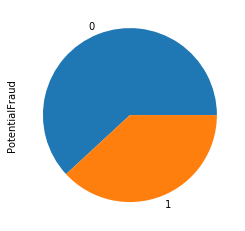

In [129]:
X.PotentialFraud.value_counts().plot(kind='pie')
X.PotentialFraud.value_counts()

In [130]:
import seaborn as sns

In [131]:
disease_columns=['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']
len(disease_columns)

11

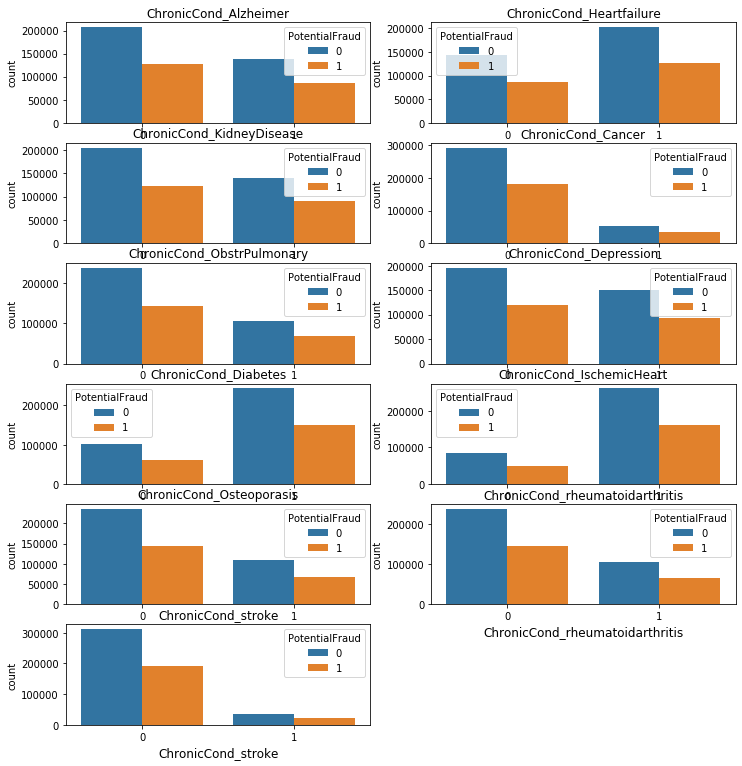

In [132]:
df2 = X[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']] # select a few attributes

#  select "no disease" and "disease" data
df_target_0 = X[(X['PotentialFraud'] == 0)]
df_target_1 = X[(X['PotentialFraud'] == 1)]


#  SUBPLOTS - FOR Loop
rowCnt = len(df2.columns)
colCnt = 2     # cols:  OVERALL, NO FRAUD, FRAUD
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(12,24))

for i in df2.columns:
    # OVERALL plots
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.title(i)
    plt.xlabel(i, fontsize=12)
    sns.countplot(X[i], hue=X.PotentialFraud)
    subCnt = subCnt + 1

plt.show()

In [133]:
X['NumberOfDisease']=X[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']].sum(axis=1)
X['NumberOfDisease'].describe()

count    558211.000000
mean          4.498616
std           2.332301
min           0.000000
25%           3.000000
50%           5.000000
75%           6.000000
max          11.000000
Name: NumberOfDisease, dtype: float64

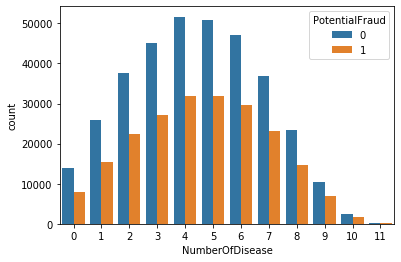

In [134]:
sns.countplot("NumberOfDisease", hue="PotentialFraud", data=X)
plt.show()

In [135]:
y=X['PotentialFraud']

In [136]:
y.shape

(558211,)

In [137]:
X['Annual_Amount']=X['IPAnnualReimbursementAmt']+X['OPAnnualReimbursementAmt']-X['IPAnnualDeductibleAmt']-X['OPAnnualDeductibleAmt']

In [138]:
X.Annual_Amount.describe()

count    558211.000000
mean       6287.741263
std       11982.106115
min      -34828.000000
25%         370.000000
50%        1630.000000
75%        6692.000000
max      259719.000000
Name: Annual_Amount, dtype: float64

In [139]:
X=X[['InscClaimAmtReimbursed','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt','Age', 'Patient_IN','NumberOfDisease']]

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 17 columns):
InscClaimAmtReimbursed             558211 non-null int64
ChronicCond_Alzheimer              558211 non-null int64
ChronicCond_Heartfailure           558211 non-null int64
ChronicCond_KidneyDisease          558211 non-null int64
ChronicCond_Cancer                 558211 non-null int64
ChronicCond_ObstrPulmonary         558211 non-null int64
ChronicCond_Depression             558211 non-null int64
ChronicCond_Diabetes               558211 non-null int64
ChronicCond_IschemicHeart          558211 non-null int64
ChronicCond_Osteoporasis           558211 non-null int64
ChronicCond_rheumatoidarthritis    558211 non-null int64
ChronicCond_stroke                 558211 non-null int64
IPAnnualReimbursementAmt           558211 non-null int64
OPAnnualReimbursementAmt           558211 non-null int64
Age                                558211 non-null float64
Patient_IN                      

## Training begins

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [142]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, plot_roc_curve

In [144]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [145]:
accuracy_score(y_test, y_pred)

0.6788244672751539

In [146]:
confusion_matrix(y_test, y_pred)

array([[53441, 15517],
       [20340, 22345]])

In [147]:
f1_score(y_test, y_pred)

0.5548313407079097

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75     68958
           1       0.59      0.52      0.55     42685

    accuracy                           0.68    111643
   macro avg       0.66      0.65      0.65    111643
weighted avg       0.67      0.68      0.67    111643



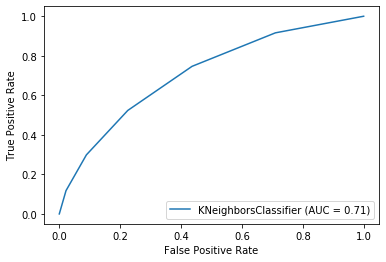

In [149]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [150]:
model_knn="model_knn.pkl"
scaler_minmax="scalar_minmax.pkl"

import pickle
pickle.dump(knn, open(model_knn, 'wb'))

pickle.dump(scaler, open(scaler_minmax, 'wb'))

